In [4]:
import matplotlib as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sbn

In [6]:
TitanicData = 'titanic.csv'

In [7]:
TData = pd.read_csv(TitanicData)

In [8]:
TData

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


# Child Survival

In [9]:
SurvivalData = TData[['Survived', 'Pclass', 'Age']].copy()

In [10]:
SurvivalData

,Survived,Pclass,Age
0,0,3,22.0
1,1,1,38.0
2,1,3,26.0
3,1,1,35.0
4,0,3,35.0
...,...,...,...
882,0,2,27.0
883,1,1,19.0
884,0,3,7.0
885,1,1,26.0


In [11]:
Children = SurvivalData.query('Age <= 10 and Pclass == 3')

In [12]:
Children.count()

Survived    53
Pclass      53
Age         53
dtype: int64

In [13]:
CSData = Children.query('Survived == 1')

In [14]:
CSData.count()

Survived    22
Pclass      22
Age         22
dtype: int64

In [15]:
print(22/53)

0.41509433962264153


# Average Cost

In [16]:
TData["Fare"].mean()

32.30542018038328

In [17]:
PaidFair = TData.query('Fare > 0')

In [18]:
PaidFair["Fare"].mean()

32.861132683486204

# Passenger-Class Fares

In [19]:
ClassFares = TData[['Pclass', 'Fare']].copy()

In [20]:
ClassFares.head()

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500


In [21]:
ClassFaresPer = ClassFares.groupby('Pclass')

In [22]:
ClassFaresPer.describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       487.0  13.707707  11.817309  0.0   7.75000   8.0500  15.5   69.5500

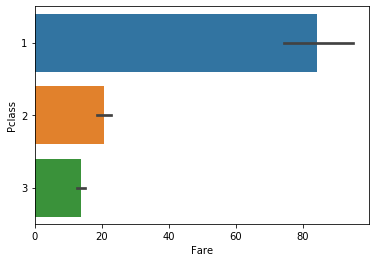

In [23]:
sbn.barplot(x='Fare',y='Pclass', data=ClassFares, orient='h')

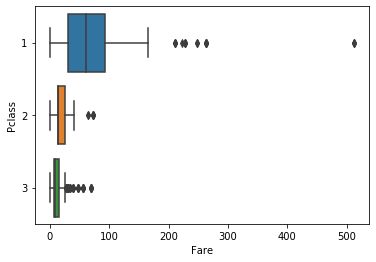

In [24]:
sbn.boxplot(x='Fare',y='Pclass', data=ClassFares, orient='h')

In [25]:
ClassFaresPaid = ClassFares.query('Fare > 0')

In [26]:
ClassFaresPerPaid = ClassFaresPaid.groupby('Pclass')

In [27]:
ClassFaresPerPaid.describe()

Fare                                                            \
        count       mean        std      min      25%      50%      75%   
Pclass                                                                    
1       211.0  86.148874  78.212155   5.0000  32.9104  61.9792  99.9625   
2       178.0  21.358661  13.083169  10.5000  13.0000  15.0229  26.0000   
3       483.0  13.821229  11.799807   4.0125   7.7500   8.0500  15.5000   

                  
             max  
Pclass            
1       512.3292  
2        73.5000  
3        69.5500

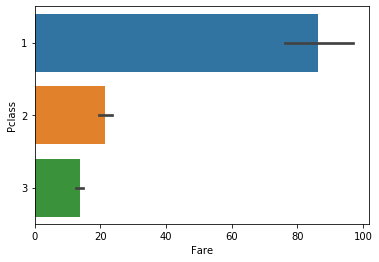

In [28]:
sbn.barplot(x='Fare',y='Pclass', data=ClassFaresPaid, orient='h')

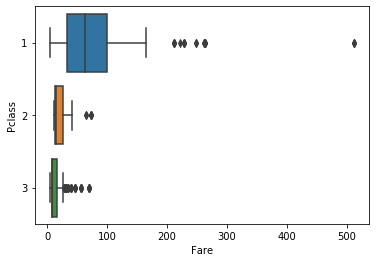

In [29]:
sbn.boxplot(x='Fare',y='Pclass', data=ClassFaresPaid, orient='h')

In [30]:
ClassFares.count()

Pclass    887
Fare      887
dtype: int64

In [31]:
ClassFaresPaid.count()

Pclass    872
Fare      872
dtype: int64